<a href="https://colab.research.google.com/github/vijaynadimpalli/MelbourneHousingDataAnalysis/blob/main/MelbourneDataAnalysis_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Method 1 - with basic data analysis....

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow import keras

In [ ]:
zip = zipfile.ZipFile('/content/drive/My Drive/NEW_DATASCIENCE_PROJECTS/Udemy Data Science & ML/TensorFlow_FILES.zip')
zip.extractall()
df = pd.read_csv('/content/TensorFlow_FILES/DATA/melb_data.csv')
pd.set_option('display.max_columns',500)

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#removing top 1% of data according to price(outliers)
df.drop(df["Price"].sort_values(ascending=False).iloc[0:int(0.01*df.shape[0])].index,inplace=True)
df.shape

(13445, 21)

In [ ]:
#Converting price to logarithmic in hope of achieving a normal distribution
df['Price'] = df['Price'].apply(np.log)

In [ ]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6405
YearBuilt        5333
CouncilArea      1356
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
#Removing BuildingArea and YearBuilt due to high number of missing data...
df.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

In [ ]:
#Dropping rows with missing values in Car column...
df.drop(df[df['Car'].isna()].index,inplace=True)

There are four columns(Region, Coucil Area,PostCode,suburb) which contain redundant info.

Region > Coucil Area > PostCode > suburb

Need to remove this redundancy by dropping some columns

In [ ]:
#Total number of council areas present.....
print("Total number of council areas present = {}".format(df['CouncilArea'].value_counts().count()))

print("Total number of suburbs present = {}".format(df['Suburb'].value_counts().count()))

Total number of council areas present = 33
Total number of suburbs present = 314


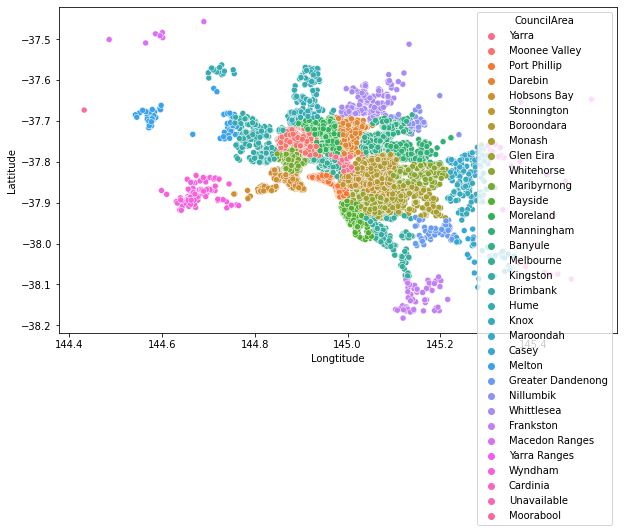

In [ ]:
#Map of Melboune with various councils highlighted

plt.figure(figsize=(10,6))
sns.scatterplot(y='Lattitude',x='Longtitude',data=df,hue='CouncilArea')

In [ ]:
!pip install category_encoders

import category_encoders as ce

In [ ]:
#Converting CouncilArea into binary,and removing the remaining redundant info

bin_encoder = ce.BinaryEncoder()
enc_data = bin_encoder.fit_transform(df['CouncilArea'])
df = pd.concat([df,enc_data],axis=1)

#Suburb has too many unique values to be useful...
df.drop(['Suburb','Postcode','CouncilArea','Regionname'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#Dropping adress column as does not appear useful...
df.drop(['Address'],axis=1,inplace=True)

In [ ]:
df['Type'].value_counts()

h    9256
u    3014
t    1113
Name: Type, dtype: int64

In [ ]:
#Converting Type column to one hot
df = pd.concat([df,pd.get_dummies(df['Type'],drop_first=True)],axis=1)
df.drop('Type',axis=1,inplace=True)

In [ ]:
df['Method'].value_counts()

S     8905
SP    1688
PI    1536
VB    1163
SA      91
Name: Method, dtype: int64

In [ ]:
#Converting Method column to one hot
df = pd.concat([df,pd.get_dummies(df['Method'],drop_first=True)],axis=1)
df.drop('Method',axis=1,inplace=True)

In [ ]:
df['SellerG'].value_counts().count()

268

In [ ]:
#Converting SellerG column to binary
# bin_encoder = ce.BinaryEncoder()
# enc_data = bin_encoder.fit_transform(df['SellerG'])
# df = pd.concat([df,enc_data],axis=1)

#Dropping SellerG as it contains too many unique values
df.drop('SellerG',axis=1,inplace=True)

In [ ]:
df['Date'].value_counts()

27/05/2017    468
3/06/2017     392
12/08/2017    380
17/06/2017    373
27/11/2016    353
29/07/2017    339
4/03/2017     335
24/06/2017    328
25/02/2017    328
22/07/2017    317
10/12/2016    315
8/07/2017     309
18/03/2017    300
15/10/2016    298
15/07/2017    292
12/11/2016    287
3/12/2016     279
8/04/2017     278
1/07/2017     275
19/11/2016    260
20/05/2017    258
18/06/2016    255
28/05/2016    254
8/10/2016     249
13/05/2017    248
7/05/2016     244
24/09/2016    239
17/09/2016    239
16/09/2017    238
28/08/2016    237
26/08/2017    234
23/09/2017    234
10/09/2016    234
29/04/2017    217
16/04/2016    215
27/06/2016    211
4/06/2016     211
3/09/2016     205
3/09/2017     203
22/05/2016    202
19/08/2017    194
7/11/2016     193
14/05/2016    191
9/09/2017     189
22/08/2016    189
30/07/2016    171
6/08/2016     154
16/07/2016    141
6/05/2017     138
22/04/2017    134
26/07/2016    132
13/08/2016    129
23/04/2016    100
11/02/2017     83
12/06/2016     46
11/03/2017

In [ ]:
#Feature Engineering the Date column into linear numerical format
print(df['Date'].apply(lambda x : str.split(x,sep='/',maxsplit=1)[1]).value_counts().index.sort_values())
df['Date_new'] = df['Date'].apply(lambda x : str.split(x,sep='/',maxsplit=1)[1])

df['Date_new'].replace(['01/2016', '02/2016', '03/2016', '04/2016', '05/2016','06/2016', '07/2016',
       '08/2016', '09/2016', '10/2016', '11/2016',
       '12/2016','01/2017', '02/2017', '03/2017', '04/2017', '05/2017','06/2017', '07/2017',
       '08/2017', '09/2017', '10/2017', '11/2017',
       '12/2017'],np.arange(0,24,1),inplace=True)

df.drop('Date',inplace=True,axis=1)

Index(['01/2016', '02/2016', '02/2017', '03/2017', '04/2016', '04/2017',
       '05/2016', '05/2017', '06/2016', '06/2017', '07/2016', '07/2017',
       '08/2016', '08/2017', '09/2016', '09/2017', '10/2016', '11/2016',
       '12/2016'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13383 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13383 non-null  int64  
 1   Price          13383 non-null  float64
 2   Distance       13383 non-null  float64
 3   Bedroom2       13383 non-null  float64
 4   Bathroom       13383 non-null  float64
 5   Car            13383 non-null  float64
 6   Landsize       13383 non-null  float64
 7   Lattitude      13383 non-null  float64
 8   Longtitude     13383 non-null  float64
 9   Propertycount  13383 non-null  float64
 10  CouncilArea_0  13383 non-null  int64  
 11  CouncilArea_1  13383 non-null  int64  
 12  CouncilArea_2  13383 non-null  int64  
 13  CouncilArea_3  13383 non-null  int64  
 14  CouncilArea_4  13383 non-null  int64  
 15  CouncilArea_5  13383 non-null  int64  
 16  CouncilArea_6  13383 non-null  int64  
 17  t              13383 non-null  uint8  
 18  u     

In [ ]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'Lattitude', 'Longtitude', 'Propertycount', 'CouncilArea_0',
       'CouncilArea_1', 'CouncilArea_2', 'CouncilArea_3', 'CouncilArea_4',
       'CouncilArea_5', 'CouncilArea_6', 't', 'u', 'S', 'SA', 'SP', 'VB',
       'Date_new'],
      dtype='object')

In [ ]:
#Starting modelling part

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = df['Price'].values
y=np.expand_dims(y,axis=1)

X = df.drop('Price',axis=1).values

print(X.shape)
print(y.shape)

(13383, 23)
(13383, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=101)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [ ]:
def build_model1(learning_rate=0.01):
  model = Sequential()
  model.add(Dense(23,activation='relu'))
  model.add(Dense(23,activation='relu'))
  model.add(Dense(23,activation='relu'))
  model.add(Dense(23,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))

  adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=adam_opt)

  return model


def run_model(model,batch_size=32,epochs=500): 
  output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)
  return output

def pred_model(model):
  y_predt = model.predict(X_train)
  y_pred = model.predict(X_test)
  print("Mean absolute error on train data : " + str(mean_absolute_error(y_train,y_predt)/np.mean(y_train)))
  print("Mean absolute error on test data : " + str( mean_absolute_error(y_test,y_pred)/np.mean(y_test)))
  print("r2_score on train data : " + str(r2_score(y_train,y_predt)))
  print("r2_score on test data : " + str(r2_score(y_test,y_pred)))
  print("Explained variance score : " + str(explained_variance_score(y_test,y_pred)))

Epoch 1/200
84/84 [==============================] - 0s 5ms/step - loss: 166.2391 - val_loss: 15.7842
Epoch 2/200
84/84 [==============================] - 0s 3ms/step - loss: 3.8221 - val_loss: 1.0056
Epoch 3/200
84/84 [==============================] - 0s 3ms/step - loss: 0.7640 - val_loss: 0.6135
Epoch 4/200
84/84 [==============================] - 0s 3ms/step - loss: 0.5031 - val_loss: 0.4073
Epoch 5/200
84/84 [==============================] - 0s 3ms/step - loss: 0.3538 - val_loss: 0.2888
Epoch 6/200
84/84 [==============================] - 0s 3ms/step - loss: 0.2647 - val_loss: 0.2203
Epoch 7/200
84/84 [==============================] - 0s 3ms/step - loss: 0.2105 - val_loss: 0.1793
Epoch 8/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1764 - val_loss: 0.1614
Epoch 9/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1533 - val_loss: 0.1320
Epoch 10/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1331 - val_loss: 0.1199
Epoch 

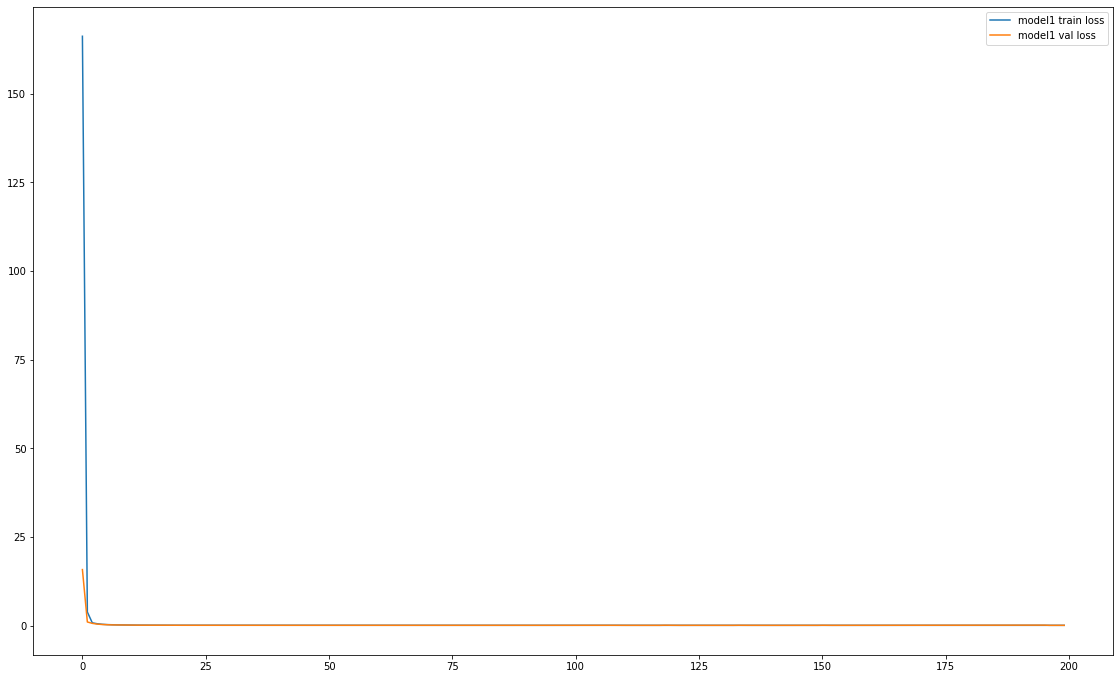

In [ ]:
model1 = build_model1(0.001)

output1 = pd.DataFrame(run_model(model1,128,200).history)

fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0,0,1,1])
ax.plot(output1['loss'],label='model1 train loss')
ax.plot(output1['val_loss'],label='model1 val loss')

ax.legend()

pred_model(model1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBRT = GradientBoostingRegressor(max_depth=2, n_estimators=120)
GBRT.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in GBRT.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

GBRT_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
GBRT_best.fit(X_train, y_train)
y_pred = GBRT_best.predict(X_test)

# Display
print('Gradient Boosting Regressor')
print('\nR-squared training set:')
print(GBRT_best.score(X_train, y_train))

print('\nR-squared test set:')
print(GBRT_best.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor

R-squared training set:
0.8163380445932357

R-squared test set:
0.8070504131586971


Pretty low values of R2

Let's try improving our EDA and feature engineering

# Method 2 - advanced data analysis...

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow import keras

In [188]:
zip = zipfile.ZipFile('/content/drive/My Drive/NEW_DATASCIENCE_PROJECTS/Udemy Data Science & ML/TensorFlow_FILES.zip')
zip.extractall()
df = pd.read_csv('/content/TensorFlow_FILES/DATA/melb_data.csv')
pd.set_option('display.max_columns',500)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [190]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [191]:
#Removing the following columns...
df.drop(['Suburb','Address','CouncilArea','SellerG'],axis=1,inplace=True)

In [192]:
df['Price'] = df['Price'].apply(np.log)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(12.611537753638338, 0, '0.01')

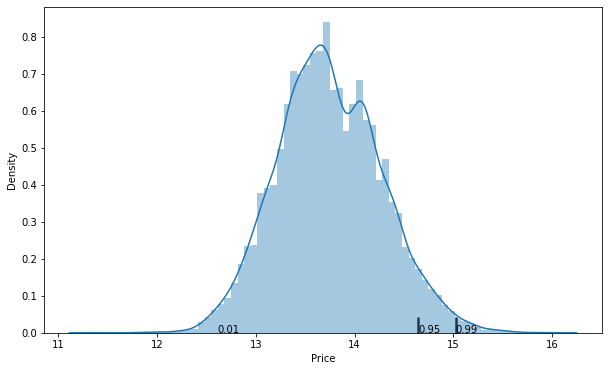

In [193]:
#Figuring out percentiles on the price dist
plt.figure(figsize=(10,6))
ax = sns.distplot(df['Price'],bins=70)
percentile_95 = df['Price'].sort_values().reset_index(drop=True).iloc[int(df['Price'].shape[0]*0.95)]
percentile_99 = df['Price'].sort_values().reset_index(drop=True).iloc[int(df['Price'].shape[0]*0.99)]
percentile_01 = df['Price'].sort_values().reset_index(drop=True).iloc[int(df['Price'].shape[0]*0.01)]

sns.scatterplot(ax=ax,x=[percentile_95,percentile_99],y=[0,0],s=1000, color=".1", marker="|")
ax.text(percentile_95,0,s="0.95",fontsize=10)
ax.text(percentile_99,0,s="0.99",fontsize=10)
ax.text(percentile_01,0,s="0.01",fontsize=10)

In [194]:
#removing the top 1% and bottom 1% of data
df.sort_values(by='Price',inplace=True)
df.reset_index(drop=True,inplace=True)
df = df[(df['Price']>percentile_01) & (df['Price']<=percentile_99)]
df.reset_index(drop=True,inplace=True)
df

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,1,u,12.614866,S,17/06/2017,4.3,3032.0,1.0,1.0,1.0,887.0,45.0,1972.0,-37.76878,144.89197,Western Metropolitan,4918.0
1,3,u,12.614866,SP,10/09/2016,11.2,3073.0,3.0,1.0,1.0,0.0,63.0,1970.0,-37.72720,145.00570,Northern Metropolitan,21650.0
2,2,u,12.619837,S,3/06/2017,14.7,3030.0,2.0,1.0,2.0,471.0,NaN,NaN,-37.88275,144.66661,Western Metropolitan,16166.0
3,1,u,12.623137,SP,27/11/2016,6.5,3071.0,1.0,1.0,1.0,0.0,41.0,1970.0,-37.75420,145.01000,Northern Metropolitan,8870.0
4,1,u,12.628067,SP,8/04/2017,8.1,3161.0,1.0,1.0,1.0,750.0,43.0,1965.0,-37.86780,145.01970,Southern Metropolitan,6923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13290,4,h,15.016980,S,25/02/2017,13.7,3188.0,4.0,3.0,2.0,627.0,303.0,1997.0,-37.94490,145.00680,Southern Metropolitan,5454.0
13291,4,h,15.019983,S,3/12/2016,2.6,3121.0,4.0,2.0,2.0,319.0,NaN,1893.0,-37.82440,145.00440,Northern Metropolitan,14949.0
13292,4,h,15.019983,S,3/06/2017,5.3,3122.0,4.0,2.0,2.0,371.0,276.0,1890.0,-37.81474,145.02609,Southern Metropolitan,11308.0
13293,2,h,15.024471,S,4/03/2017,7.5,3123.0,2.0,1.0,2.0,826.0,NaN,NaN,-37.84040,145.05160,Southern Metropolitan,6482.0


In [195]:
df['Car'].value_counts()

2.0     5523
1.0     5359
0.0     1008
3.0      730
4.0      484
5.0       59
6.0       51
8.0        8
7.0        7
10.0       3
9.0        1
Name: Car, dtype: int64

In [196]:
#Figuring out correlation between columns...
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.531642,0.306527,0.048350,0.941534,0.583951,0.397942,0.023893,0.118956,-0.052651,0.022279,0.094221,-0.085708
Price,0.531642,1.000000,-0.156455,0.085213,0.508188,0.426097,0.232088,0.032326,0.089096,-0.374390,-0.229460,0.240223,-0.070084
Distance,0.306527,-0.156455,1.000000,0.432951,0.307322,0.140831,0.270798,0.025154,0.101343,0.248105,-0.133931,0.248224,-0.055079
Postcode,0.048350,0.085213,0.432951,1.000000,0.053887,0.111227,0.047195,0.024407,0.054207,0.036502,-0.404954,0.449575,0.063474
Bedroom2,0.941534,0.508188,0.307322,0.053887,1.000000,0.575512,0.394731,0.023944,0.117113,-0.041307,0.021839,0.095966,-0.085346
Bathroom,0.583951,0.426097,0.140831,0.111227,0.575512,1.000000,0.306574,0.036416,0.105916,0.172185,-0.065313,0.113084,-0.055505
Car,0.397942,0.232088,0.270798,0.047195,0.394731,0.306574,1.000000,0.025420,0.091907,0.118015,0.001700,0.059183,-0.024477
Landsize,0.023893,0.032326,0.025154,0.024407,0.023944,0.036416,0.025420,1.000000,0.501079,0.040967,0.010019,0.010390,-0.006755
BuildingArea,0.118956,0.089096,0.101343,0.054207,0.117113,0.105916,0.091907,0.501079,1.000000,0.028860,0.045552,-0.026230,-0.028642
YearBuilt,-0.052651,-0.374390,0.248105,0.036502,-0.041307,0.172185,0.118015,0.040967,0.028860,1.000000,0.058168,-0.000855,0.007026


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


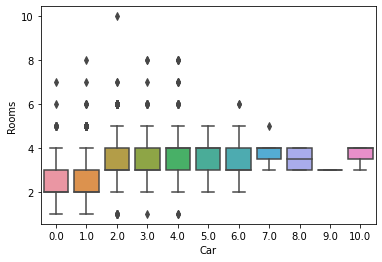

In [197]:
#Car column seems to be best correlated with Rooms...

sns.boxplot(df['Car'],df['Rooms'])

In [198]:
#we can try grouping prices to high low ,etc to find mean and fill

In [199]:
df.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6334
YearBuilt        5288
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [200]:
#Removing rows with null values in Car column

df.drop(df[df['Car'].isna()==True].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [201]:
#Lots of missing values in BuildingArea, lets try and fill them
df['BuildingArea'].isna().sum()

6301

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


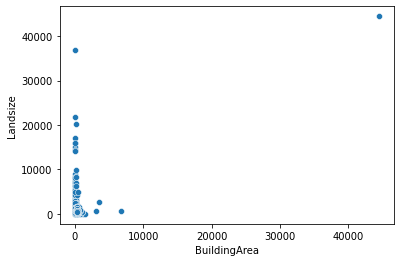

In [202]:
#Seems to be a lot of outliers in Building area...


sns.scatterplot(df['BuildingArea'],df['Landsize'])

In [203]:
#Dropping outliers...
df.drop(df[df['BuildingArea']>1000].index,inplace=True)

df.drop(df[df['Landsize']>10000].index,inplace=True)

In [204]:
#removing theoutliers of building area changed corr completely....

#Buildingarea shows weak correlation with landsize
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533182,0.304640,0.047229,0.941387,0.584935,0.397342,0.182853,0.625332,-0.052737,0.020942,0.094648,-0.084470
Price,0.533182,1.000000,-0.155758,0.084569,0.509639,0.427454,0.231623,0.114165,0.529710,-0.370881,-0.229621,0.241362,-0.069289
Distance,0.304640,-0.155758,1.000000,0.430764,0.305392,0.139161,0.269285,0.161310,0.201710,0.245647,-0.142986,0.253232,-0.052840
Postcode,0.047229,0.084569,0.430764,1.000000,0.052686,0.110066,0.044818,0.042932,0.081475,0.038134,-0.411422,0.453420,0.065833
Bedroom2,0.941387,0.509639,0.305392,0.052686,1.000000,0.576461,0.393979,0.179463,0.610452,-0.041663,0.020558,0.096472,-0.083950
Bathroom,0.584935,0.427454,0.139161,0.110066,0.576461,1.000000,0.306443,0.101177,0.561506,0.171254,-0.067088,0.114365,-0.054622
Car,0.397342,0.231623,0.269285,0.044818,0.393979,0.306443,1.000000,0.178259,0.334548,0.118650,0.000005,0.060344,-0.023735
Landsize,0.182853,0.114165,0.161310,0.042932,0.179463,0.101177,0.178259,1.000000,0.158044,0.027259,0.004259,0.078639,-0.017911
BuildingArea,0.625332,0.529710,0.201710,0.081475,0.610452,0.561506,0.334548,0.158044,1.000000,0.044080,-0.042331,0.108852,-0.069457
YearBuilt,-0.052737,-0.370881,0.245647,0.038134,-0.041663,0.171254,0.118650,0.027259,0.044080,1.000000,0.057238,-0.001036,0.005611


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


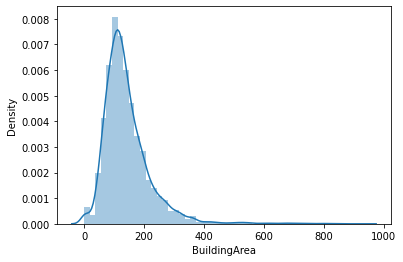

In [205]:
sns.distplot(df['BuildingArea'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


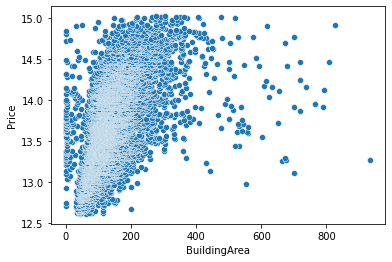

In [206]:
#Looking at relation between Building Area and Price...

sns.scatterplot(df['BuildingArea'],df['Price'])

In [207]:
#Checking whether there is any particular reason for the missingness of data...
df[df['BuildingArea'].isna()==True].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6285.000000,6285.000000,6285.000000,6285.000000,6285.000000,6285.000000,6285.000000,6285.000000,0.0,1299.000000,6285.000000,6285.000000,6285.000000
mean,2.906921,13.755684,10.175640,3105.885601,2.887351,1.456961,1.610819,498.325378,NaN,1967.164742,-37.810387,144.999674,7488.725855
std,0.920326,0.479528,5.637676,88.761717,0.944703,0.638716,0.979099,539.521371,NaN,33.985413,0.078602,0.102088,4416.525100
min,1.000000,12.619837,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,NaN,1850.000000,-38.182550,144.485710,249.000000
25%,2.000000,13.415033,6.300000,3046.000000,2.000000,1.000000,1.000000,195.000000,NaN,1950.000000,-37.857100,144.935000,4380.000000
50%,3.000000,13.732129,9.500000,3087.000000,3.000000,1.000000,2.000000,480.000000,NaN,1970.000000,-37.801800,145.004300,6567.000000
75%,3.000000,14.093142,13.000000,3148.000000,3.000000,2.000000,2.000000,662.000000,NaN,1997.000000,-37.754800,145.061500,10331.000000
max,10.000000,15.024471,47.300000,3977.000000,20.000000,8.000000,10.000000,8680.000000,NaN,2017.000000,-37.500870,145.453760,21650.000000


In [208]:
df[df['BuildingArea'].isna()==False].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6657.000000,6915.000000,6915.000000,6915.000000
mean,2.982213,13.733136,10.216327,3104.102820,2.955604,1.591179,1.605640,456.606363,142.422294,1964.521256,-37.807752,144.991826,7423.186262
std,0.947174,0.502632,6.023769,92.426058,0.949809,0.700971,0.933234,553.647287,80.405312,37.689396,0.080577,0.105650,4350.639784
min,1.000000,12.614866,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,13.361380,6.200000,3044.000000,2.000000,1.000000,1.000000,166.000000,94.000000,1940.000000,-37.856740,144.925185,4380.000000
50%,3.000000,13.698977,9.200000,3082.000000,3.000000,1.000000,2.000000,400.000000,126.000000,1970.000000,-37.801700,144.996700,6543.000000
75%,4.000000,14.092194,13.000000,3148.000000,4.000000,2.000000,2.000000,632.500000,172.000000,2000.000000,-37.755860,145.056800,10175.000000
max,8.000000,15.019983,47.400000,3977.000000,9.000000,8.000000,10.000000,9838.000000,934.000000,2018.000000,-37.408530,145.526350,21650.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


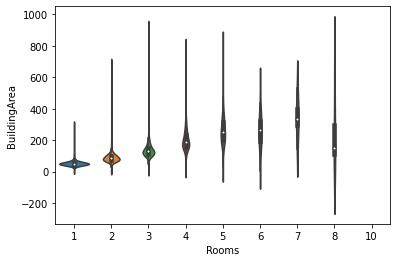

In [209]:
sns.violinplot(df['Rooms'],df['BuildingArea'])
#So, as number of rooms increases building area increases....

#Seems to have a good relation with number of rooms

In [210]:
#Using Rooms to fill missing data in Building Area
mean_rooms = df.groupby(by='Rooms')['BuildingArea'].mean()

df['BuildingArea'] = df.apply(lambda x:mean_rooms[x['Rooms']] if np.isnan(x['BuildingArea']) else x['BuildingArea'],axis=1)

df.drop(df[df['BuildingArea'].isna()].index,inplace=True)

In [211]:
df.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5244
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


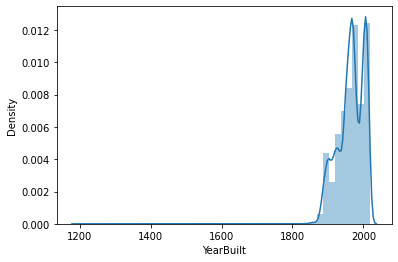

In [212]:
#Looking at Year Built
sns.distplot(df['YearBuilt'])

In [213]:
df.drop(df[df['YearBuilt']<1850].index,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


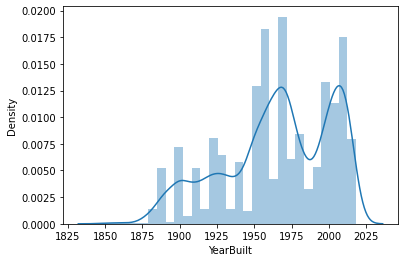

In [214]:
sns.distplot(df['YearBuilt'])

In [215]:
df.corr()['YearBuilt']

Rooms           -0.055828
Price           -0.380280
Distance         0.253979
Postcode         0.040378
Bedroom2        -0.044318
Bathroom         0.173403
Car              0.128791
Landsize         0.031835
BuildingArea     0.023094
YearBuilt        1.000000
Lattitude        0.056778
Longtitude       0.002120
Propertycount    0.009011
Name: YearBuilt, dtype: float64

So, distplot were pretty meaningless and there seems to be no real correlation from corr, now look at missingness of data ...

http://www.stat.columbia.edu/~gelman/arm/missing.pdf

Important link about the missingness of data and how to clean missing data....

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


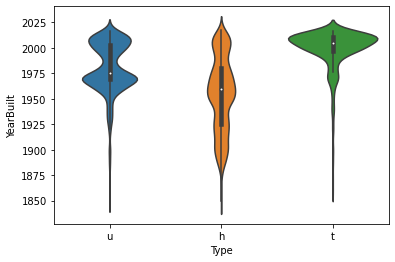

In [216]:
sns.violinplot(df['Type'],df['YearBuilt'])

interesting that t's are pretty recent...

In [217]:
df[df['YearBuilt'].isna()==False]['Type'].value_counts()

h    5269
u    1924
t     760
Name: Type, dtype: int64

In [218]:
df[df['YearBuilt'].isna()]['Type'].value_counts()

h    3958
u     937
t     349
Name: Type, dtype: int64

nothing too revealing...

In [219]:
#okay lets try classifying price and take median and give it to year built...

In [220]:
stdp = np.mean(df['Price']) + np.std(df['Price'])
stdm = np.mean(df['Price']) - np.std(df['Price'])
df['PriceClass'] = df.apply(lambda x: 'u' if x['Price'] > stdp else ('d' if x['Price'] < stdm else 'm'),axis=1)

In [221]:
priceclass_median = df.groupby(by='PriceClass')['YearBuilt'].median()
priceclass_median['u']

1938.0

In [222]:
df['YearBuilt'] = df.apply(lambda x: priceclass_median[x['PriceClass']] if np.isnan(x['YearBuilt'])  else x['YearBuilt'],axis = 1)

So divided the price into classes and used the median of that class to fill year built values.....

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197 entries, 0 to 13232
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13197 non-null  int64  
 1   Type           13197 non-null  object 
 2   Price          13197 non-null  float64
 3   Method         13197 non-null  object 
 4   Date           13197 non-null  object 
 5   Distance       13197 non-null  float64
 6   Postcode       13197 non-null  float64
 7   Bedroom2       13197 non-null  float64
 8   Bathroom       13197 non-null  float64
 9   Car            13197 non-null  float64
 10  Landsize       13197 non-null  float64
 11  BuildingArea   13197 non-null  float64
 12  YearBuilt      13197 non-null  float64
 13  Lattitude      13197 non-null  float64
 14  Longtitude     13197 non-null  float64
 15  Regionname     13197 non-null  object 
 16  Propertycount  13197 non-null  float64
 17  PriceClass     13197 non-null  object 
dtypes: flo

In [224]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.534385,0.305039,0.047438,0.941132,0.585050,0.398025,0.183900,0.732878,-0.105955,0.020292,0.094529,-0.085077
Price,0.534385,1.000000,-0.155821,0.084546,0.510766,0.427588,0.231581,0.114285,0.506630,-0.424217,-0.229606,0.241336,-0.069355
Distance,0.305039,-0.155821,1.000000,0.430750,0.305784,0.139107,0.269171,0.161915,0.228861,0.217393,-0.142997,0.253187,-0.053010
Postcode,0.047438,0.084546,0.430750,1.000000,0.052903,0.110136,0.044725,0.043081,0.063699,0.013218,-0.411410,0.453421,0.065781
Bedroom2,0.941132,0.510766,0.305784,0.052903,1.000000,0.576544,0.394635,0.180476,0.699053,-0.095021,0.019916,0.096354,-0.084548
Bathroom,0.585050,0.427588,0.139107,0.110136,0.576544,1.000000,0.306634,0.101622,0.555290,0.076179,-0.067352,0.114371,-0.054702
Car,0.398025,0.231581,0.269171,0.044725,0.394635,0.306634,1.000000,0.178546,0.339399,0.060806,0.000110,0.060112,-0.024051
Landsize,0.183900,0.114285,0.161915,0.043081,0.180476,0.101622,0.178546,1.000000,0.162065,0.008914,0.004304,0.078696,-0.017753
BuildingArea,0.732878,0.506630,0.228861,0.063699,0.699053,0.555290,0.339399,0.162065,1.000000,-0.030885,-0.021167,0.105803,-0.066951
YearBuilt,-0.105955,-0.424217,0.217393,0.013218,-0.095021,0.076179,0.060806,0.008914,-0.030885,1.000000,0.073421,-0.029368,0.012746


In [225]:
#Dropping postcode and priceclass
df.drop(['Postcode','PriceClass'],axis=1,inplace=True)

In [226]:
#Converting Type Method and Regionname to one hot...
df = pd.concat([df,pd.get_dummies(df['Type'],drop_first=True),pd.get_dummies(df['Method'],drop_first=True),
                pd.get_dummies(df['Regionname'],drop_first=True)],axis=1)

df.drop(['Type','Method','Regionname'],axis=1,inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197 entries, 0 to 13232
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       13197 non-null  int64  
 1   Price                       13197 non-null  float64
 2   Date                        13197 non-null  object 
 3   Distance                    13197 non-null  float64
 4   Bedroom2                    13197 non-null  float64
 5   Bathroom                    13197 non-null  float64
 6   Car                         13197 non-null  float64
 7   Landsize                    13197 non-null  float64
 8   BuildingArea                13197 non-null  float64
 9   YearBuilt                   13197 non-null  float64
 10  Lattitude                   13197 non-null  float64
 11  Longtitude                  13197 non-null  float64
 12  Propertycount               13197 non-null  float64
 13  t                           131

In [228]:
#Feature Engineering Month and Year from Date column...
df['MonthSold'] = pd.to_datetime(df['Date']).apply(lambda x:x.month)
df['YearSold'] = pd.to_datetime(df['Date']).apply(lambda x:x.year)
df.drop(['Date'],axis=1,inplace=True)

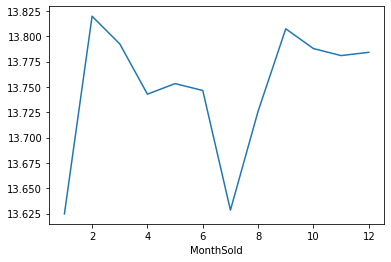

In [229]:
#There exists a relation between month sold and price
df.groupby(by='MonthSold')['Price'].mean().plot()

In [230]:
df.info()

#Final dataset...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197 entries, 0 to 13232
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       13197 non-null  int64  
 1   Price                       13197 non-null  float64
 2   Distance                    13197 non-null  float64
 3   Bedroom2                    13197 non-null  float64
 4   Bathroom                    13197 non-null  float64
 5   Car                         13197 non-null  float64
 6   Landsize                    13197 non-null  float64
 7   BuildingArea                13197 non-null  float64
 8   YearBuilt                   13197 non-null  float64
 9   Lattitude                   13197 non-null  float64
 10  Longtitude                  13197 non-null  float64
 11  Propertycount               13197 non-null  float64
 12  t                           13197 non-null  uint8  
 13  u                           131

In [231]:
#Starting modelling part

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [232]:
y = df['Price'].values
y=np.expand_dims(y,axis=1)

X = df.drop('Price',axis=1).values

In [233]:
print(X.shape)
print(y.shape)

(13197, 26)
(13197, 1)


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=101)

In [235]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [237]:
from sklearn.ensemble import GradientBoostingRegressor

GBRT = GradientBoostingRegressor(max_depth=2, n_estimators=120)
GBRT.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in GBRT.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

GBRT_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
GBRT_best.fit(X_train, y_train)
y_pred = GBRT_best.predict(X_test)

# Display
print('Gradient Boosting Regressor')
print('\nR-squared training set:')
print(GBRT_best.score(X_train, y_train))

print('\nR-squared test set:')
print(GBRT_best.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor

R-squared training set:
0.8423336759405182

R-squared test set:
0.8343195858251944


In [238]:
import tensorflow as tf
def r2(labels,predictions):
  unexplained_error = tf.reduce_sum(tf.square(labels - predictions))
  total_error = tf.reduce_sum(tf.square(labels - tf.reduce_mean(labels, axis=0)))
  R2 = 1. - tf.compat.v1.div(unexplained_error, total_error)

  return R2


def build_model1(learning_rate=0.001):
  model = Sequential()
  model.add(Dense(20,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))

  adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=adam_opt,metrics=[r2])

  return model


def run_model(model,batch_size=32,epochs=50):
  #lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6*(10**(epoch/100)))

  output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,callbacks=[])
  return output

def pred_model(model):
  y_predt = model.predict(X_train)
  y_pred = model.predict(X_test)
  print("Mean absolute error on train data : " + str(mean_absolute_error(y_train,y_predt)/np.mean(y_train)))
  print("Mean absolute error on test data : " + str( mean_absolute_error(y_test,y_pred)/np.mean(y_test)))
  print("r2_score on train data : " + str(r2_score(y_train,y_predt)))
  print("r2_score on test data : " + str(r2_score(y_test,y_pred)))
  print("Explained variance score : " + str(explained_variance_score(y_test,y_pred)))

Epoch 1/500
165/165 [==============================] - 0s 2ms/step - loss: 85.1991 - r2: -364.8754 - val_loss: 2.4789 - val_r2: -10.2195
Epoch 2/500
165/165 [==============================] - 0s 1ms/step - loss: 1.6943 - r2: -6.1934 - val_loss: 1.2671 - val_r2: -4.7083
Epoch 3/500
165/165 [==============================] - 0s 1ms/step - loss: 1.1045 - r2: -3.6913 - val_loss: 0.9558 - val_r2: -3.2873
Epoch 4/500
165/165 [==============================] - 0s 2ms/step - loss: 0.8427 - r2: -2.5849 - val_loss: 0.7140 - val_r2: -2.1930
Epoch 5/500
165/165 [==============================] - 0s 1ms/step - loss: 0.6167 - r2: -1.6249 - val_loss: 0.5151 - val_r2: -1.3017
Epoch 6/500
165/165 [==============================] - 0s 1ms/step - loss: 0.4376 - r2: -0.8614 - val_loss: 0.3639 - val_r2: -0.6286
Epoch 7/500
165/165 [==============================] - 0s 1ms/step - loss: 0.3089 - r2: -0.3170 - val_loss: 0.2727 - val_r2: -0.2238
Epoch 8/500
165/165 [==============================] - 0s 1ms/ste

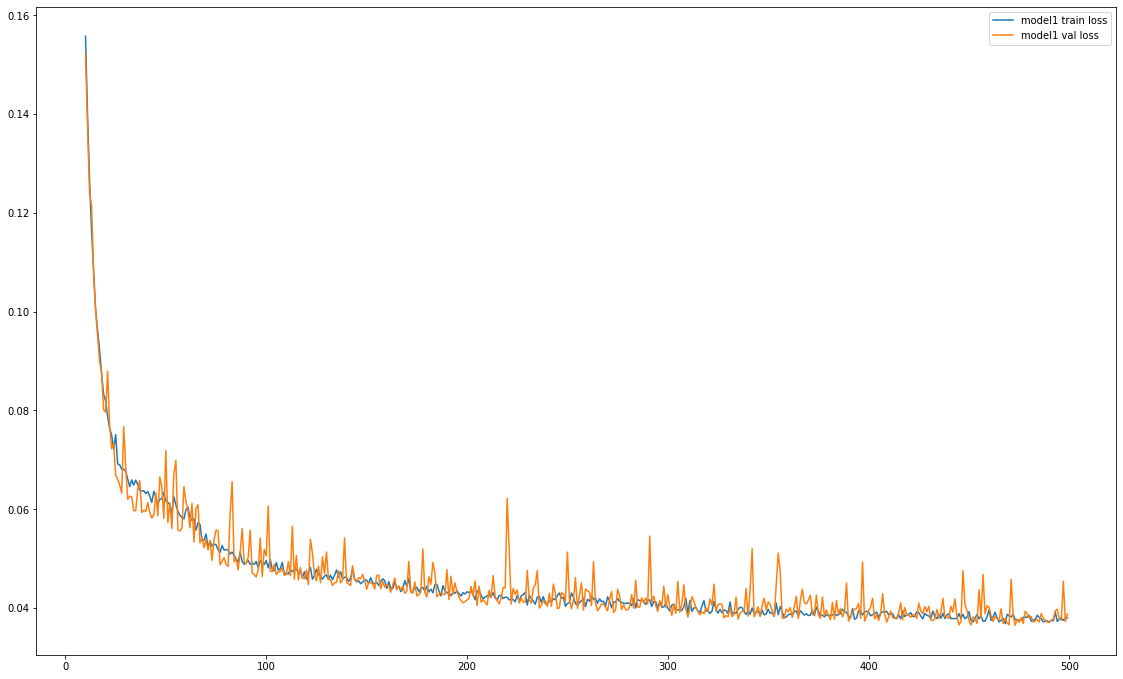

In [239]:
model1 = build_model1(1e-3)

output1 = pd.DataFrame(run_model(model1,64,500).history)

#plt.semilogx(output1['lr'][10:],output1['val_loss'][10:])


fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0,0,1,1])
ax.plot(output1['loss'][10:],label='model1 train loss')
ax.plot(output1['val_loss'][10:],label='model1 val loss')

ax.legend()

pred_model(model1)

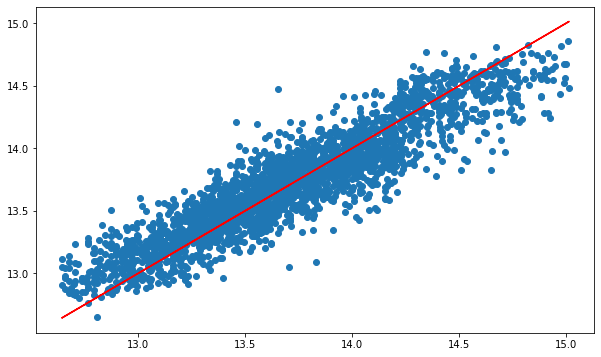

In [240]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

In [241]:
#Both GB and NN seem to produce decent results...

#Now try to use RandomizedSearchCV on GB to improve our results

In [242]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

In [243]:
from sklearn.model_selection import RandomizedSearchCV

In [244]:
# define our parameter ranges
learning_rate=[0.01]
alpha=[0.01,0.03,0.05,0.1,0.3, 0.9]
n_estimators=[int(x) for x in np.linspace(start = 10, stop = 500, num = 4)]
max_depth=[int(x) for x in np.linspace(start = 3, stop = 15, num = 4)]
max_depth.append(None)
min_samples_split=[int(x) for x in np.linspace(start = 2, stop = 5, num = 4)]
min_samples_leaf=[int(x) for x in np.linspace(start = 1, stop = 4, num = 4)]
max_features=['auto', 'sqrt']

# Create the random grid
param_grid = {'learning_rate':learning_rate,
              'alpha':alpha,
              'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
             }

print(param_grid)

# Initialize and fit the model.
model = GradientBoostingRegressor()
model = RandomizedSearchCV(model, param_grid, cv=3)
model.fit(X_train_sample, y_train_sample)

# get the best parameters
best_params = model.best_params_
print(best_params)


{'learning_rate': [0.01], 'alpha': [0.01, 0.03, 0.05, 0.1, 0.3, 0.9], 'n_estimators': [10, 173, 336, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 7, 11, 15, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'n_estimators': 336, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'learning_rate': 0.01, 'alpha': 0.3}


In [245]:
model_best = GradientBoostingRegressor(**best_params)
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [246]:
feature_importance = model_best.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

top_features = np.where(feature_importance > 20)
top_features = df.columns[top_features].ravel()

In [247]:
# Display.
print('Optimized Gradient Boosting Regressor')
print('\nR-squared training set:')
print(model_best.score(X_train, y_train))
print('\nMean absolute error training set: ')
print(mean_absolute_error(y_train, model_best.predict(X_train)))
print('\nMean squared error training set: ')
print(mean_squared_error(y_train, model_best.predict(X_train)))

print('\n\nR-squared test set:')
print(model_best.score(X_test, y_test))
print('\nMean absolute error test set: ')
print(mean_absolute_error(y_test, y_pred))
print('\nMean squared error test set: ')
print(mean_squared_error(y_test, y_pred))

# top features
print('\nTop indicators:')
print(top_features)

Optimized Gradient Boosting Regressor

R-squared training set:
0.9835681180256376

Mean absolute error training set: 
0.04730239646589491

Mean squared error training set: 
0.004008989339591856


R-squared test set:
0.8844335530252816

Mean absolute error test set: 
0.12455126796710389

Mean squared error test set: 
0.027023776125479147

Top indicators:
['Rooms' 'Price' 'Distance' 'Bedroom2' 'Car' 'Landsize' 'BuildingArea'
 'YearBuilt' 'Lattitude' 't' 'South-Eastern Metropolitan']


In [248]:
#Good results overall...